In [ ]:
# Import necessary libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Load the data from your JSON file
with open('random_answers_kplus1_4shot_1calls_10_0_bm25_dl_19_utility_scores.json', 'r') as f:
    data = json.load(f)

# Prepare data for Baseline and Average Augmented Utilities
query_ids = []
baseline_utilities = []
avg_augmented_utilities = []

doc_rows = []

for qid, qdata in data.items():
    query_ids.append(qid)
    baseline_utilities.append(qdata.get('Baseline_Utility'))
    avg_augmented_utilities.append(qdata.get('Average_Augmented_Utility'))
    
    for doc_id, doc_data in qdata.items():
        if doc_id in ['Baseline_Utility', 'Average_Augmented_Utility']:
            continue  # Skip these keys
        doc_rows.append({
            'QueryID': qid,
            'DocumentID': doc_id,
            'AugmentedUtility': doc_data.get('Augmented_Utility')
        })

# Create DataFrames
baseline_df = pd.DataFrame({
    'QueryID': query_ids,
    'BaselineUtility': baseline_utilities,
    'AvgAugmentedUtility': avg_augmented_utilities
})

doc_df = pd.DataFrame(doc_rows)

# Display first few rows of the DataFrames
print("Baseline DataFrame:",baseline_df.count())
display(baseline_df.head())
x = baseline_df['BaselineUtility']
display(x.sum())

print("\nDocument Utilities DataFrame:")
display(doc_df.head(10))


Baseline DataFrame: QueryID                43
BaselineUtility        42
AvgAugmentedUtility    42
dtype: int64


,QueryID,BaselineUtility,AvgAugmentedUtility
0,156493,0.041489,-0.149137
1,1110199,0.536700,0.038482
2,1063750,0.509387,0.207713
3,130510,0.158790,0.177995
4,489204,0.930351,0.173149


6.0136886735615125


Document Utilities DataFrame:


,QueryID,DocumentID,AugmentedUtility
0,156493,8182161,-0.282485
1,156493,6139386,0.011820
2,156493,3288600,-0.157539
3,156493,3288596,-0.096359
4,156493,3288597,-0.221122
5,1110199,3838645,0.001232
6,1110199,554521,-0.023962
7,1110199,398442,0.094577
8,1110199,4511137,0.127306
9,1110199,5218014,-0.006742


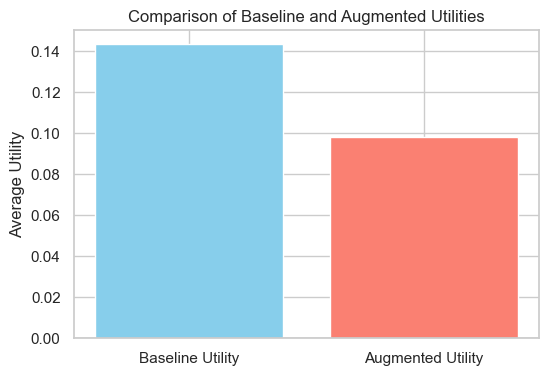

In [39]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
utilities = ['Baseline Utility', 'Augmented Utility']
values = [baseline_df['BaselineUtility'].mean(), baseline_df['AvgAugmentedUtility'].mean()]

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(utilities, values, color=['skyblue', 'salmon'])
plt.ylabel('Average Utility')
plt.title('Comparison of Baseline and Augmented Utilities')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()


improved : 19/42 0.4523809523809524
degraded : 23/42 0.5476190476190477


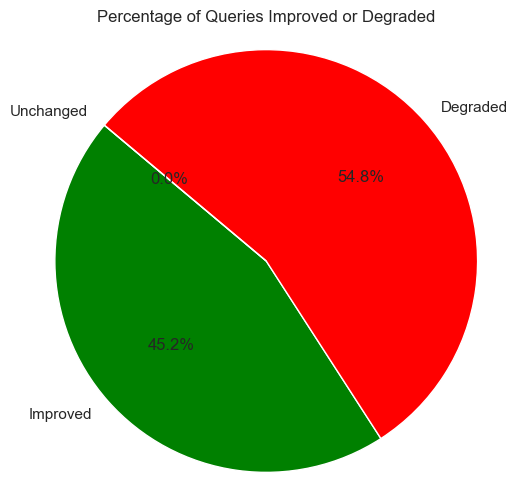

In [38]:
# Calculate counts
improved = (baseline_df['AvgAugmentedUtility'] > baseline_df['BaselineUtility']).sum()
print(f"improved : {improved}/42",improved/42)
degraded = (baseline_df['AvgAugmentedUtility'] < baseline_df['BaselineUtility']).sum()
print(f"degraded : {degraded}/42",degraded/42)
unchanged = (baseline_df['AvgAugmentedUtility'] == baseline_df['BaselineUtility']).sum()

# Prepare data
counts = [improved, degraded, unchanged]
labels = ['Improved', 'Degraded', 'Unchanged']
colors = ['green', 'red', 'gray']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Percentage of Queries Improved or Degraded')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

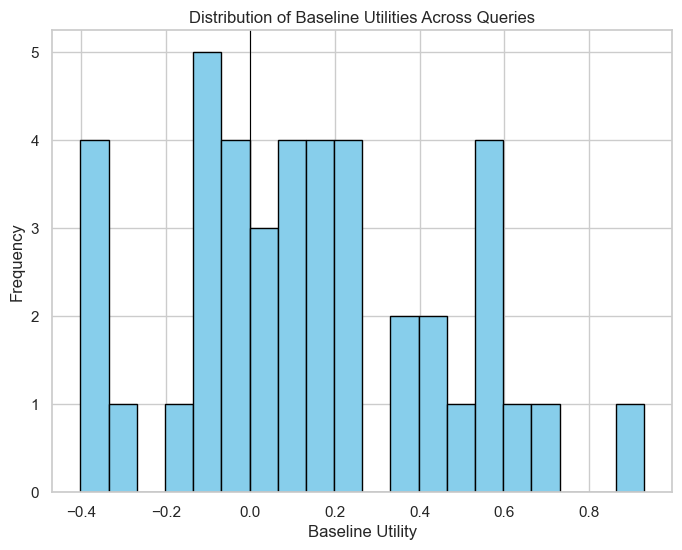

In [4]:
# Histogram of Baseline Utilities
plt.figure(figsize=(8, 6))
plt.hist(baseline_df['BaselineUtility'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Baseline Utilities Across Queries')
plt.xlabel('Baseline Utility')
plt.ylabel('Frequency')
plt.axvline(0, color='black', linewidth=0.8)
plt.show()


The negative scores show utility decrease when No docuemnts were given in the context.
The positive scores show utility increase when No documents were givn.

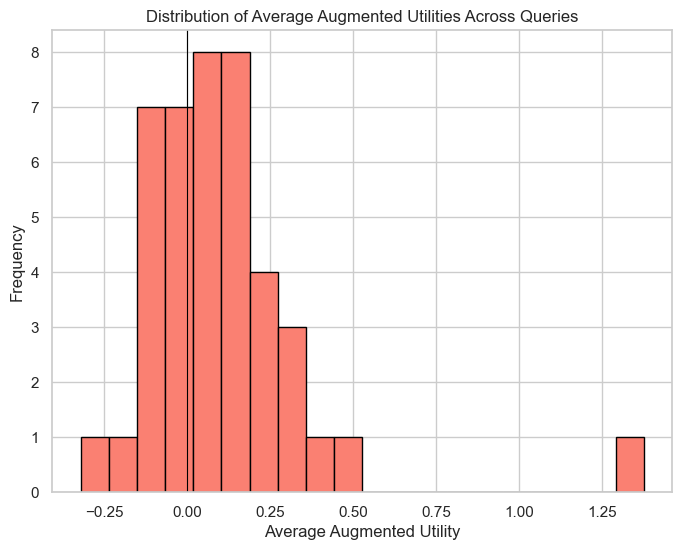

In [6]:
# Histogram of Average Augmented Utilities
plt.figure(figsize=(8, 6))
plt.hist(baseline_df['AvgAugmentedUtility'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Average Augmented Utilities Across Queries')
plt.xlabel('Average Augmented Utility')
plt.ylabel('Frequency')
plt.axvline(0, color='black', linewidth=0.8)
plt.show()


Negative values (e.g., -0.25) indicate scenarios where adding additional documents decreased the performance.
The majority of queries have augmented utility values concentrated around 0.0 to 0.3, which has slight improvements.
utility > 1.25, indicating exceptional case where additional documents were highly beneficial.
The graph is slightly towards right, means there is positive relationship when we add additional context.

In [ ]:
# Create a pivot table for the heatmap
heatmap_df = doc_df.pivot(index='DocumentID', columns='QueryID', values='AugmentedUtility')

# Create Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, cmap='coolwarm', center=0)
plt.title('Augmented Utility of Documents Across Queries')
plt.ylabel('Document ID')
plt.xlabel('Query ID')
plt.show()


In [9]:
# Top 10 Queries with Highest Baseline Utility
top_baseline = baseline_df.sort_values(by='BaselineUtility', ascending=False).head(10)
print("Top 10 Queries with Highest Baseline Utility:")
display(top_baseline)

# Bottom 10 Queries with Lowest Average Augmented Utility
bottom_avg_aug = baseline_df.sort_values(by='AvgAugmentedUtility').head(10)
print("Bottom 10 Queries with Lowest Average Augmented Utility:")
display(bottom_avg_aug)


Top 10 Queries with Highest Baseline Utility:


,QueryID,BaselineUtility,AvgAugmentedUtility
4,489204,0.930351,0.173149
24,1114819,0.708928,0.060631
31,443396,0.654319,0.031887
29,1103812,0.563060,0.336948
16,451602,0.559975,0.232864
20,131843,0.541675,0.030666
1,1110199,0.536700,0.038482
2,1063750,0.509387,0.207713
10,915593,0.448072,0.019807
34,855410,0.422923,0.276233


Bottom 10 Queries with Lowest Average Augmented Utility:


,QueryID,BaselineUtility,AvgAugmentedUtility
22,833860,-0.389693,-0.321299
7,1133167,-0.366857,-0.151961
0,156493,0.041489,-0.149137
26,1106007,0.237407,-0.121790
30,87181,-0.056168,-0.110956
38,405717,-0.366498,-0.109489
27,1124210,-0.283633,-0.082251
36,19335,0.388523,-0.078563
33,87452,0.075871,-0.075833
12,1121402,-0.038069,-0.058656


In [19]:
# Read BM25 scores from a CSV file
bm25_df = pd.read_csv('/Users/sahilsuryavanshi/Downloads/rag-utility-lab-master copy/res/bm25_dl_19.csv')

# Display BM25 DataFrame
print("BM25 Scores DataFrame:")
display(bm25_df.head(10))

BM25 Scores DataFrame:


,qid,docid,docno,rank,score,query
0,156493,8182161,8182161,0,31.156444,do goldfish grow
1,156493,6139386,6139386,1,31.032333,do goldfish grow
2,156493,3288600,3288600,2,30.953843,do goldfish grow
3,156493,3288596,3288596,3,30.754021,do goldfish grow
4,156493,2259183,2259183,4,30.362477,do goldfish grow
5,156493,3288597,3288597,5,30.362477,do goldfish grow
6,156493,8182166,8182166,6,30.213869,do goldfish grow
7,156493,2411918,2411918,7,30.204733,do goldfish grow
8,156493,8029433,8029433,8,30.161059,do goldfish grow
9,156493,95514,95514,9,29.755883,do goldfish grow


In [ ]:


# Prepare data for Baseline and Average Augmented Utilities
query_ids = []
baseline_utilities = []
avg_augmented_utilities = []
doc_rows = []

for qid, qdata in data.items():
    query_ids.append(qid)
    baseline_utilities.append(qdata.get('Baseline_Utility'))
    avg_augmented_utilities.append(qdata.get('Average_Augmented_Utility'))

    for doc_id, doc_data in qdata.items():
        if doc_id in ['Baseline_Utility', 'Average_Augmented_Utility']:
            continue  # Skip these keys
        doc_rows.append({
            'QueryID': qid,
            'DocumentID': doc_id,
            'AugmentedUtility': doc_data.get('Augmented_Utility')
        })

# Create DataFrames
baseline_df = pd.DataFrame({
    'QueryID': query_ids,
    'BaselineUtility': baseline_utilities,
    'AvgAugmentedUtility': avg_augmented_utilities
})

doc_df = pd.DataFrame(doc_rows)

# Display first few rows of the DataFrames
print("Baseline DataFrame:")
display(baseline_df.head())

print("\nDocument Utilities DataFrame:")
display(doc_df.head())

# Load BM25 scores from your data
# Ensure bm25_df has columns: 'qid', 'docid', 'docno', 'rank', 'score', 'query'
# For this example, we'll assume bm25_df is already loaded with the correct columns

# Ensure data types match for merging
doc_df['QueryID'] = doc_df['QueryID'].astype(str)
doc_df['DocumentID'] = doc_df['DocumentID'].astype(str)
bm25_df['qid'] = bm25_df['qid'].astype(str)
bm25_df['docid'] = bm25_df['docid'].astype(str)

# Merge BM25 scores into doc_df using the existing column names
doc_df = pd.merge(
    doc_df,
    bm25_df,
    left_on=['QueryID', 'DocumentID'],
    right_on=['qid', 'docid'],
    how='left'
)

# Check for successful merge
# print("Merged DataFrame:")
display(doc_df.head())

# Sort doc_df by QueryID and score in descending order
doc_df.sort_values(by=['QueryID', 'score'], ascending=[True, False], inplace=True)

# Assign ranks within each QueryID
doc_df['DocumentRank'] = doc_df.groupby('QueryID').cumcount() + 1

# Proceed with your scatter plots and analyses


Baseline DataFrame:


,QueryID,BaselineUtility,AvgAugmentedUtility
0,156493,0.041489,-0.149137
1,1110199,0.536700,0.038482
2,1063750,0.509387,0.207713
3,130510,0.158790,0.177995
4,489204,0.930351,0.173149



Document Utilities DataFrame:


,QueryID,DocumentID,AugmentedUtility
0,156493,8182161,-0.282485
1,156493,6139386,0.011820
2,156493,3288600,-0.157539
3,156493,3288596,-0.096359
4,156493,3288597,-0.221122


Merged DataFrame:


,QueryID,DocumentID,AugmentedUtility,qid,docid,docno,rank,score,query
0,156493,8182161,-0.282485,156493,8182161,8182161,0,31.156444,do goldfish grow
1,156493,6139386,0.011820,156493,6139386,6139386,1,31.032333,do goldfish grow
2,156493,3288600,-0.157539,156493,3288600,3288600,2,30.953843,do goldfish grow
3,156493,3288596,-0.096359,156493,3288596,3288596,3,30.754021,do goldfish grow
4,156493,3288597,-0.221122,156493,3288597,3288597,5,30.362477,do goldfish grow


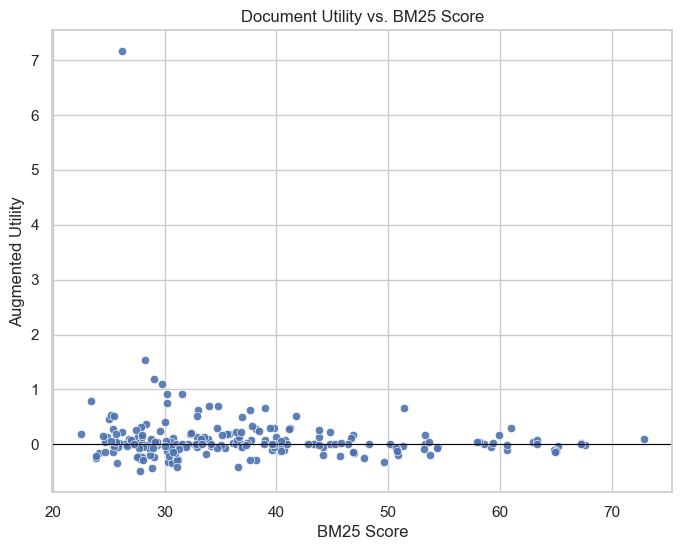

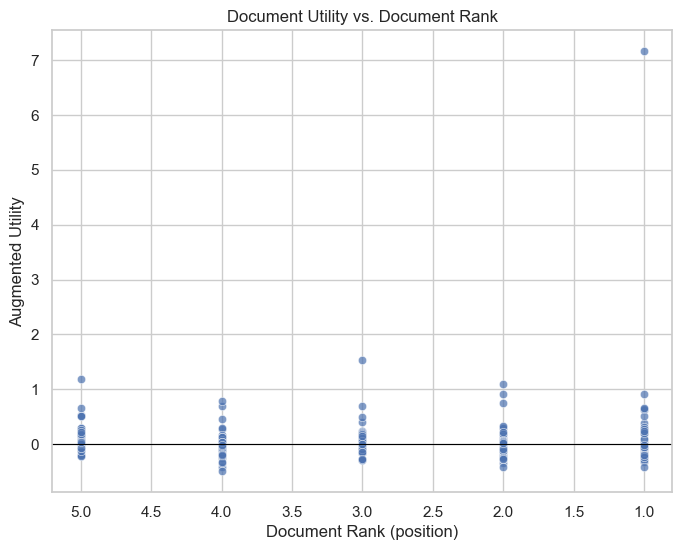

In [46]:
# Scatter Plot: Augmented Utility vs. BM25 Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='score', y='AugmentedUtility', data=doc_df, alpha=0.9)
plt.title('Document Utility vs. BM25 Score')
plt.xlabel('BM25 Score')
plt.ylabel('Augmented Utility')
plt.axhline(0, color='black', linewidth=0.8)
plt.show()

# Scatter Plot: Augmented Utility vs. Document Rank
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DocumentRank', y='AugmentedUtility', data=doc_df, alpha=0.7)
plt.title('Document Utility vs. Document Rank')
plt.xlabel('Document Rank (position)')
plt.ylabel('Augmented Utility')
plt.gca().invert_xaxis()  # Invert x-axis to show rank 1 on the left
plt.axhline(0, color='black', linewidth=0.8)
plt.show()
